<h1><b>Big Data Analytics Project</b></h1>
<h3><b>Credit Card Fraud Detection</b></h3>
By:<br>
<mark><b>SOUBHIK SINHA &nbsp&nbsp&nbsp=> (19BIT0303)<br>
AASHISH BANSAL => (19BIT0346)<b></mark>

Component: `RANDOM FOREST`

# Connecting to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Packages

In [2]:
import pandas as ps
import numpy as ny
import matplotlib.pyplot as pypt
from matplotlib import gridspec
import seaborn as sbn

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

# Loading Dataset

In [3]:
cred = ps.read_csv("/content/drive/MyDrive/Project - ITE2013 - Big Data - Credit Card Fraud Detection/dataset/creditcard.csv")

# Exploratory Data Analysis

In [4]:
cred.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Shape of the Dataset
This will tell us the number of rows and columns which are present in the dataset.

In [5]:
print("The shape of the dataset is: {}".format(cred.shape))

The shape of the dataset is: (284807, 31)


## Description of Dataset

In [6]:
cred.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,7.094854e-13,1.875015e-12,1.053488e-12,7.137527e-13,-1.491363e-13,-5.225914e-13,-2.280712e-13,-6.428517e-13,4.958987e-13,7.060712e-13,1.766038e-12,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Number of Frauds

In [7]:
valid_transactions = cred[cred['Class'] == 0]
fraud_transactions = cred[cred['Class'] == 1]
percentage = len(fraud_transactions)/float(len(valid_transactions))
print('No. of Valid Transactions : {}'.format(len(cred[cred['Class'] == 0])))
print('No. of Fraudulent Transactions : {}'.format(len(cred[cred['Class'] == 1])))
print("The percentage of Fraud Transactions are: {}".format(percentage*100))

No. of Valid Transactions : 284315
No. of Fraudulent Transactions : 492
The percentage of Fraud Transactions are: 0.17304750013189596


# Problem of Unbalanced Dataset

## Fraud Transaction Amount Details

In [8]:
fraud_transactions.Amount.describe() 

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

## Valid Transaction Amount Details

In [9]:
valid_transactions.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Have a look over the mean for transaction for the Fraudulet cases - they are much higher than the valid ones.

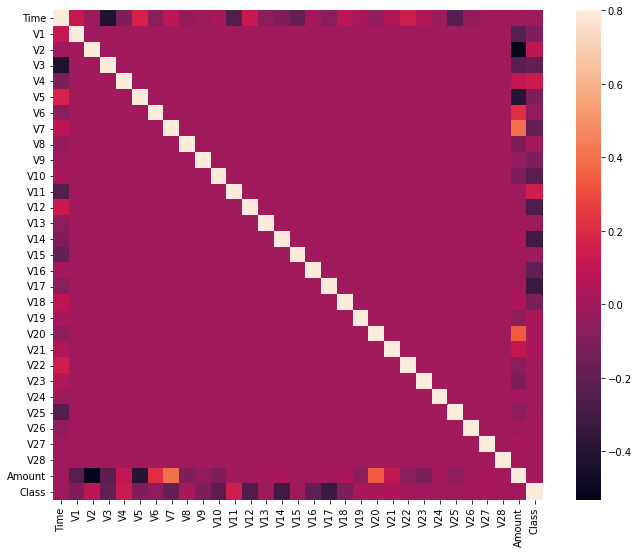

In [10]:
cormatx = cred.corr()
figure = pypt.figure(figsize = (12,9))
sbn.heatmap(cormatx,vmax = 0.8 , square = True)
pypt.show()

If you see the two consecuive coloured blocks of every feature (from V1,V2,V3....to amount and class), you will see there is not much correlation among the features.

# Models

## Model 1

### Splitting the Dataset
For now, we are not dropping anything.

In [11]:
Y = cred["Class"]
X = cred.drop(['Class'],axis = 1)

In [12]:
x_Train, x_Test, y_Train, y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### Creating the Models

In [13]:
model_default = RandomForestClassifier()

### Fitting on the Model

In [14]:
model_default.fit(x_Train, y_Train)

RandomForestClassifier()

### Predicting Results

In [15]:
y_Predict = model_default.predict(x_Test)

### Precision

In [16]:
precision = precision_score(y_Test, y_Predict)
print("Precision: {}".format(precision))

Precision: 0.9746835443037974


### Accuracy

In [17]:
accuracy = accuracy_score(y_Test, y_Predict)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.9995962220427653


### F1-Score

In [18]:
f1_score = f1_score(y_Test, y_Predict)
print("F1-Score: {}".format(f1_score))

F1-Score: 0.8700564971751412


### Recall

In [19]:
recall = recall_score(y_Test, y_Predict)
print("Recall: {}".format(recall))

Recall: 0.7857142857142857


### Confusion Matrix

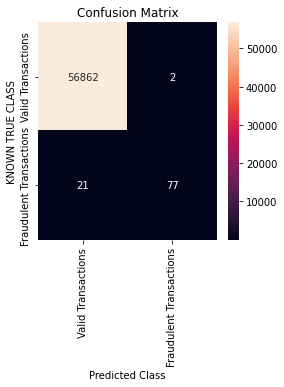

In [20]:
LABELS = ['Valid Transactions', 'Fraudulent Transactions']
confusion_matrix = confusion_matrix(y_Test, y_Predict)
pypt.figure(figsize =(4, 4))
sbn.heatmap(confusion_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
pypt.title("Confusion Matrix")
pypt.ylabel('KNOWN TRUE CLASS')
pypt.xlabel('Predicted Class')
pypt.show()

## Model 2 - Columns Dropped

### Splitting the Dataset
For now, we are dropping the columns based on correlation.

In [21]:
Y = cred["Class"]
X = cred.drop(['V1', 'V2', 'V5', 'V6', 'V7', 'V8', 'V9', 'V13', 'V15', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],axis = 1)

In [22]:
x_Train, x_Test, y_Train, y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### Creating the Models

In [23]:
model_default = RandomForestClassifier()

### Fitting on the Model

In [24]:
model_default.fit(x_Train, y_Train)

RandomForestClassifier()

### Predicting Results

In [25]:
y_Predict = model_default.predict(x_Test)

### Precision

In [26]:
precision = precision_score(y_Test, y_Predict)
print("Precision: {}".format(precision))

Precision: 1.0


### Accuracy

In [27]:
accuracy = accuracy_score(y_Test, y_Predict)
print("Accuracy: {}".format(accuracy))

Accuracy: 1.0


### Recall

In [28]:
recall = recall_score(y_Test, y_Predict)
print("Recall: {}".format(recall))

Recall: 1.0


# User Input Testing

In [29]:
time = input("Enter the Time: ")
amount = input("Enter the Amount: ")
v3 = input("Enter V3: ")
v4 = input("Enter V4: ")
v10 = input("Enter V10: ")
v11 = input("Enter V11: ")
v12 = input("Enter V12: ")
v14 = input("Enter V14: ")
v16 = input("Enter V16: ")
c = input("Enter the expected class: ")

Enter the Time: 1.0
Enter the Amount: 378.0
Enter V3: 0.265789
Enter V4: 0.248654
Enter V10: 0.483531
Enter V11: 0.765954
Enter V12: 0.798568
Enter V14: 0.916425
Enter V16: 0.463523
Enter the expected class: 1


In [30]:
df = ps.DataFrame(columns=["Time","Amount","V3", "V4", "V10", "V11", "V12", "V14", "V16", "Class"])
df1 = ps.DataFrame(data=[[time,amount,v3,v4,v10,v11,v12,v14,v16,c]],columns=["Time","Amount","V3", "V4", "V10", "V11", "V12", "V14", "V16", "Class"])
df = ps.concat([df,df1],axis=0)
checking = model_default.predict(df)
if(checking[0]==0):
    print("This is a Genuine Transaction.")
else:
    print("This is a Fraud Transaction.")

This is a Fraud Transaction.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
